# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31?')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released at least 2019-01-01\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t){ (t.events = '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
mainData = soup.find("div",attrs={"class":"lister-list"})
print(mainData.prettify()[1:10000])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt9140560">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt9140560/">
    <img alt="WandaVision" class="loadlate" data-tconst="tt9140560" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYjJiZmE5ZDgtYWUxZi00MWI1LTg2MmEtZmUwZGE2YzRkNTE5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
   </a>
  </div>
  <div class="lister-item-content">
   <h3 class="lister-item-header">
    <span class="lister-item-index unbold text-primary">
     1.
    </span>
    <a href="/title/tt9140560/">
     WandaVision
    </a>
    <span class="lister-item-year text-muted unbold">
     (2021)
    </span>
   </h3>
   <p class="text-muted">
    <span class="genre">
     Action, Comedy, Drama
    </span>
   </p>
  

In [9]:
data_list = mainData.find_all("div" ,attrs={"class":"lister-item mode-advanced"})
data_list[:7]

[<div class="lister-item mode-advanced">
 <div class="lister-top-right">
 <div class="ribbonize" data-caller="filmosearch" data-tconst="tt9140560"></div>
 </div>
 <div class="lister-item-image float-left">
 <a href="/title/tt9140560/"> <img alt="WandaVision" class="loadlate" data-tconst="tt9140560" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYjJiZmE5ZDgtYWUxZi00MWI1LTg2MmEtZmUwZGE2YzRkNTE5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt9140560/">WandaVision</a>
 <span class="lister-item-year text-muted unbold">(2021)</span>
 </h3>
 <p class="text-muted">
 <span class="genre">
 Action, Comedy, Drama            </span>
 </p>
 <div class="ratings-bar">
 <div class="inline-block ratings-imdb-rating" data-value="8.3" name="

Do the scrapping process here (please change this markdown with your explanation)

- 1 Cari Title terlebih dahulu, jika ketemu masukan ke tempat penampungan yang disediakan sebelumnya.
- 2 Kemudian cari rating, jika rating tidak ditemukan maka set 0.
- 3 Kemudian cari metacore, perlakuanya sama dengan rating, jika tidak ditemukan maka set 0.
- 4 Terakhir cari votes, bersihkan datanya terlebih dahulu agar memunculkan nilai yang di inginkan

In [6]:
temp = [] #initiating a tuple

for i in range(0, len(data_list)):
                                                
    
    
    condrat1 = len(mainData.find_all("div",attrs={"class":"ratings-bar"}))
    condrat2 = len(mainData.find_all("div",attrs={"class":"lister-item-content"})[i])
    
    title = mainData.find_all("h3",attrs={"class":"lister-item-header"})[i]
    rating = mainData.find_all("div",attrs={"class":"lister-item-content"})[i]

    
    if condrat2 <= 9:
        dataTittle = title.find_all("a")[0].text
        dataTittle = dataTittle.strip()
        
        

        temp.append((dataTittle,0,0,0))
    
    else:
        dataTittle = title.find_all("a")[0].text
        dataTittle = dataTittle.strip()
        
        dataRating = rating.find("strong").text
        dataRating = dataRating.strip()
        
   
        
        condmet = mainData.find_all("div",attrs={"class":"lister-item-content"})[i]
        condmetLength=(len(condmet.find_all("span",attrs={"class":"metascore favorable"})))
        
        dataVotes = rating.find_all("p",attrs={"class":"sort-num_votes-visible"})[0].text
        dataVotes = dataVotes.replace("\n","")
        dataVotes = dataVotes.replace("Votes:","")
        dataVotes = dataVotes.replace("| Gross:$858.37M","")
        dataVotes = dataVotes.replace("| Gross:$53.80M","")
        dataVotes = dataVotes.replace(",",".")
        
        
        
        if condmetLength == 0:                
            temp.append((dataTittle,dataRating,0,dataVotes))
            
           
        else :
            temp.append(
                (dataTittle,
                 dataRating,
                 condmet.find("span",attrs={"class":"metascore favorable"}).text.strip(),dataVotes) 
            )
           
    
temp

[('WandaVision', '8.3', 0, '85.699'),
 ('I Care a Lot', '6.2', '66', '52.316'),
 ('Behind Her Eyes', '7.2', 0, '19.010'),
 ('Mortal Kombat', 0, 0, 0),
 ('Superman and Lois', '8.1', 0, '5.248'),
 ('Nomadland', '7.6', '94', '27.422'),
 ('Army of the Dead', 0, 0, 0),
 ('Tribes of Europa', '6.8', 0, '5.839'),
 ('Bridgerton', '7.3', 0, '65.498'),
 ('Tell Me Your Secrets', '7.5', 0, '2.371'),
 ('Ginny & Georgia', '7.0', 0, '14.002'),
 ('Tom and Jerry', '5.3', 0, '9.579'),
 ('Firefly Lane', '7.5', 0, '10.498'),
 ("Zack Snyder's Justice League", 0, 0, 0),
 ('Monster Hunter', '5.3', 0, '21.504'),
 ('Judas and the Black Messiah', '7.7', '86', '18.132'),
 ('The Little Things', '6.3', 0, '42.995'),
 ('The Falcon and the Winter Soldier', 0, 0, 0),
 ('The Mandalorian', '8.8', 0, '296.296'),
 ("It's a Sin", '8.9', 0, '14.746'),
 ('For All Mankind', '7.7', 0, '13.817'),
 ('Drishyam 2', '8.8', 0, '18.342'),
 ('Your Honor', '7.8', 0, '21.355'),
 ('Cruella', 0, 0, 0),
 ("The Queen's Gambit", '8.6', 0, '2

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

dataIMDB = pd.DataFrame(temp)
dataIMDB.columns=["Title","Rating","Meta Score","Votes"]

dataIMDB[["Rating","Meta Score","Votes"]]=dataIMDB[["Rating","Meta Score","Votes"]].astype('float64')
sevenTopMovies = dataIMDB.sort_values(by='Votes', ascending=False).head(7)
xx = sevenTopMovies.set_index('Title')
xx.dtypes

Rating        float64
Meta Score    float64
Votes         float64
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

-  merubah tipe "Rating","Meta Score","Votes" dengan fload64
- untuk kolom Title dijadikan index


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

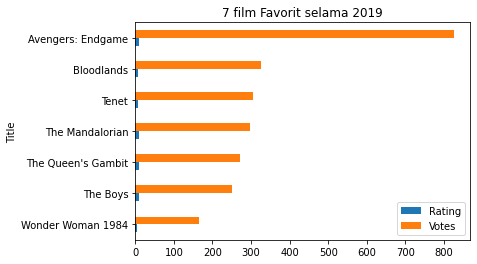

In [8]:
data = xx[["Rating","Votes"]].sort_values("Votes").plot.barh(title='7 film Favorit selama 2019')





(Put your analysis and conclusion here.)



### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.